# The Opiod Epidemic in NY 

The opiod epidemic has now killed more people than HIV/AIDS and cars at their peak mortality rates [(x)](https://www.nytimes.com/interactive/2017/04/14/upshot/drug-overdose-epidemic-you-draw-it.html). Are there counties who have better ways of coping with the spike in addiction and overdoses? What trends are there geographically in terms of clinical visits pertaining to opiods in NY state? Are there counties that have lower number of visits and mortalities from opiods? Is there a relationship between the type of insurance one has and the type of care received for an opiod visit? Over the five years this data was taken was there a significant drop in the amount of clinical visits caused by opiods in any of the counties in NY state. 

In [66]:
#import relevant packages and set up dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('data.csv')

What differences do we see between rural and urban counties?

In [67]:
drural = df[df['Rural/Urban'] == 'Rural']
durban = df[df['Rural/Urban'] == 'Urban']

print('rural rate: ' + str(drural['Overall Rate Per 1000'].mean()))
print('urban rate: ' + str(durban['Overall Rate Per 1000'].mean()))

drural.groupby('Patient County Code')
print('rural overall: ' + str(drural['Overall Opioid'].sum()))

durban.groupby('Patient County Code')
print('urban overall: ' + str(durban['Overall Opioid'].sum()))

rural rate: 0.6410111420612812
urban rate: 0.5495869565217385
rural overall: 4138
urban overall: 48238


There seems to be a higher number of cases overall in urban areas which is expected because of the higher population. Rural areas however have a higher rate per 1000 for health visits related to opiods. Further investigation is needed of the difference in rural visit rates and urban visit rates to determine if the difference in rates is significant. We can look at the rates on a county level. 

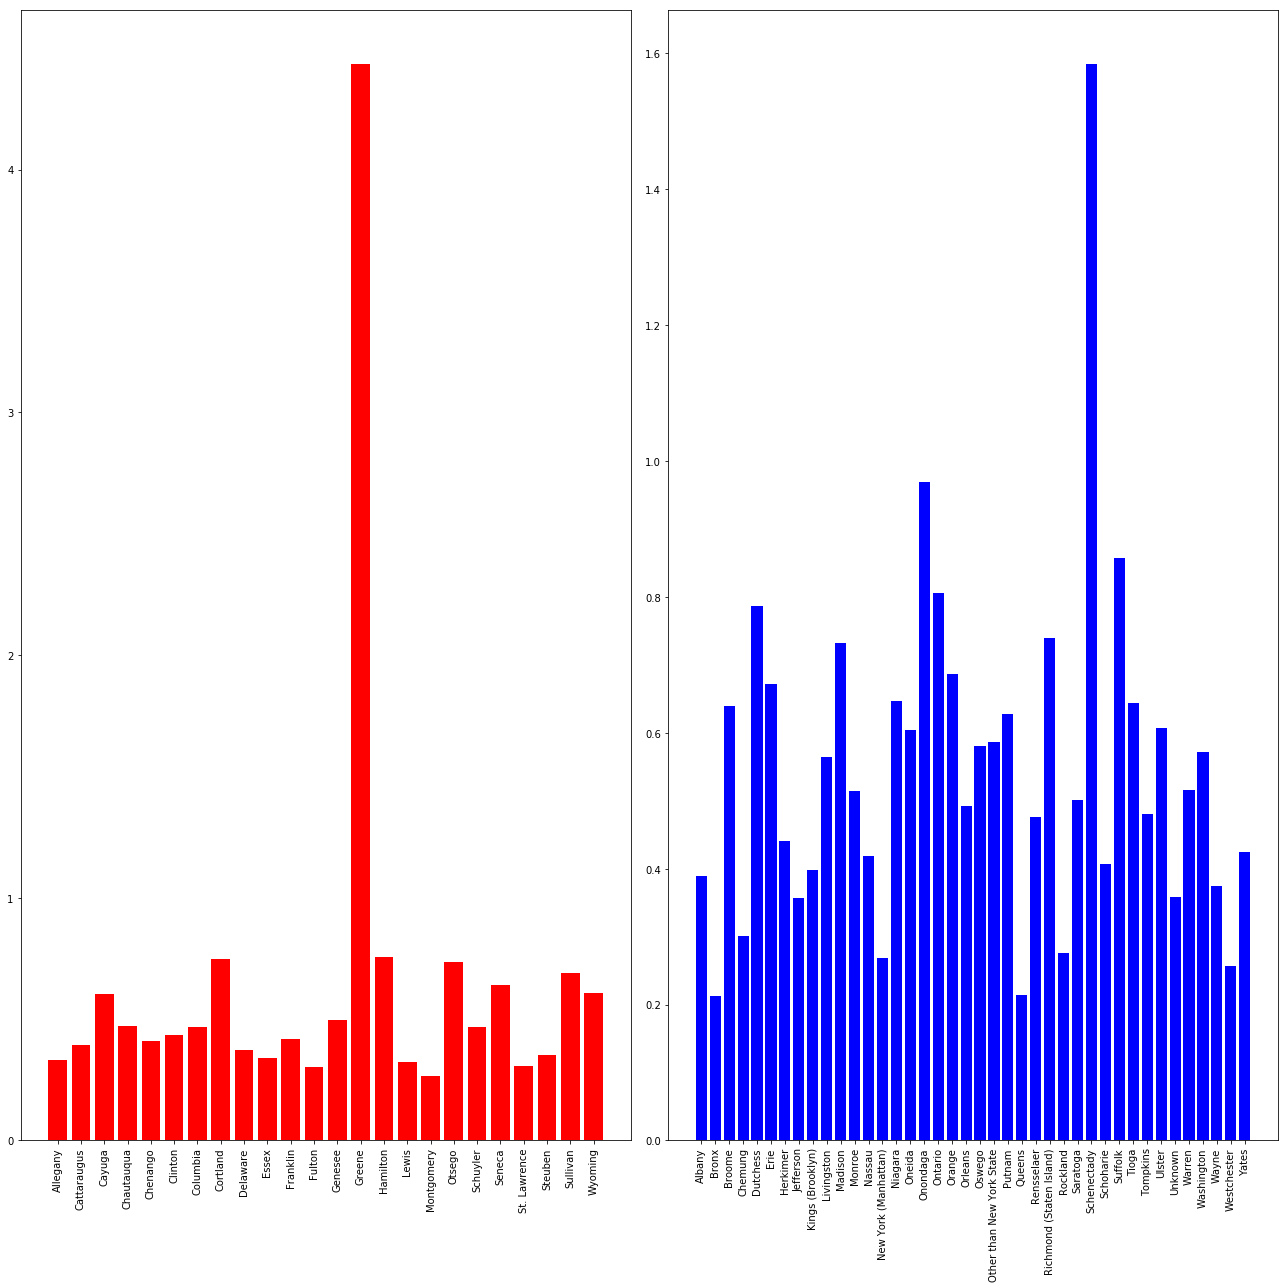

In [68]:
col = ['Patient County Name', 'Overall Rate Per 1000']

drlite = drural.loc[:, col]
dulite = durban.loc[:, col]

drlite= drlite.pivot_table(index='Patient County Name', aggfunc='mean')
dulite = dulite.pivot_table(index='Patient County Name', aggfunc='mean')

plt.subplot(1, 2, 1)
plt.bar(drlite.index, drlite['Overall Rate Per 1000'], color='red')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(dulite.index, dulite['Overall Rate Per 1000'], color='blue')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

After plotting the visit rates per 1000 for each county we see that there is one county categorized as rural, Greene, that has a rate much higher than the rest of the rural counties. It visit rate is much higher than the highest visit rate for an urban county, Schenectady. It may be interesting to explore what exactly is happening at that county, which health insurers are paying at higher rates and which kind of visits are driving this higher rate.  

In [69]:
dgreene = df[df['Patient County Name'] == 'Greene']
dgreene2 = dgreene.pivot_table(index='Year', aggfunc=np.sum)

print(dgreene2['Overall Rate Per 1000'])
print(dgreene2['Overall Opioid'])
print(dgreene2['Other Outpatient Total Opioid'])
print(dgreene2['Inpatient Total Opioid'])
print(dgreene2['ER Opioid'])

Year
2010      3.879
2011    114.084
2012      2.228
2013      4.520
2014      4.289
2015      4.074
Name: Overall Rate Per 1000, dtype: float64
Year
2010    21
2011    28
2012    21
2013    37
2014    34
2015    48
Name: Overall Opioid, dtype: int64
Year
2010    0
2011    0
2012    0
2013    0
2014    0
2015    2
Name: Other Outpatient Total Opioid, dtype: int64
Year
2010    16
2011    20
2012    11
2013    21
2014    16
2015    20
Name: Inpatient Total Opioid, dtype: int64
Year
2010     5
2011     8
2012    10
2013    16
2014    18
2015    26
Name: ER Opioid, dtype: int64


When we look closer at the numbers we see that there was a spike in terms of rate in 2011. The spike to 114 per 1000 is due mostly though to the ratio of total visits to opioid related visits being atypical. 2011 saw a lower number of overall visits causing the spike. Otherwise we can see that there were a total of 28 visits that year for opiods and that number has steadily increased year by year to 48 in 2015. If we also look at the visit types it's clear that there have only been 2 outpatient visits for opioid, both in 2015, and so most of the people are being put into inpatient. Also while there has been some variation in the total number of inpatient visits for opiods, the ER visits have steadily increased in the five years data was collected for.  

It would be interesting to see the numbers across all counties to see if this is consistent, or if there are places where more people go in for outpatient and how the mortality rates compare. This data also doesn't have the coverage data, just the payment data so it's hard to tell how much that plays a role in people seeking medical help. I should take another look at the numbers for rural versus urban counties as well since the visit rate seems to not be as reliable an indicator because of it's dependancy on people's overall healthcare visits. 

In [70]:
drural2 = drural.pivot_table(index='Year', aggfunc=np.sum)

print(drural2['Overall Rate Per 1000'])
print(drural2['Overall Opioid'])
print(drural2['Other Outpatient Total Opioid'])
print(drural2['Inpatient Total Opioid'])
print(drural2['ER Opioid'])

Year
2010     74.132
2011    162.938
2012     44.422
2013     54.010
2014     53.465
2015     71.279
Name: Overall Rate Per 1000, dtype: float64
Year
2010    542
2011    592
2012    597
2013    681
2014    749
2015    977
Name: Overall Opioid, dtype: int64
Year
2010     1
2011    20
2012     1
2013     7
2014    10
2015    26
Name: Other Outpatient Total Opioid, dtype: int64
Year
2010    333
2011    346
2012    332
2013    299
2014    304
2015    425
Name: Inpatient Total Opioid, dtype: int64
Year
2010    208
2011    226
2012    264
2013    375
2014    435
2015    526
Name: ER Opioid, dtype: int64


In [71]:
durban2 = durban.pivot_table(index='Year', aggfunc=np.sum)

print(durban2['Overall Rate Per 1000'])
print(durban2['Overall Opioid'])
print(durban2['Other Outpatient Total Opioid'])
print(durban2['Inpatient Total Opioid'])
print(durban2['ER Opioid'])

Year
2010    127.588
2011     77.740
2012     82.124
2013     85.186
2014    103.007
2015    181.661
Name: Overall Rate Per 1000, dtype: float64
Year
2010     5882
2011     6681
2012     7213
2013     7991
2014     8819
2015    11652
Name: Overall Opioid, dtype: int64
Year
2010     12
2011     50
2012     27
2013     44
2014     52
2015    160
Name: Other Outpatient Total Opioid, dtype: int64
Year
2010    3523
2011    3933
2012    4172
2013    4164
2014    4235
2015    5488
Name: Inpatient Total Opioid, dtype: int64
Year
2010    2347
2011    2698
2012    3014
2013    3783
2014    4532
2015    6004
Name: ER Opioid, dtype: int64


Its clear here that the same trends from Greene can be seen in both rural and urban counties. We noted before that urban counties have bigger populations and so will have a higher number of visits as well but the total number of visits is comparable to that of rural counties. You can also see that in both rural and urban counties most of the visits are coming through the ER and that that number has been rising. How ever unlike rural counties, urban counties have seen increases in outpatient visits as well. This likely has to do with health insurance coverage and access to rehabilitation. 

The data set clearly indicates that the opiod epidemic has only gotten worse over the five years of data collection and that most of the spike in visits is coming from ER visits, though other kinds of visits have tended to increase also. We need to try to contextualize this data with more information to further narrow down what maybe causing certain counties to have higher numbers of visits related to opiods than others. 